In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
beer = pd.read_csv("Sample Data/beerbrand.csv", index_col = 'name')
beer.head()

,calories,sodium,alcohol,cost
name,,,,
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77


In [4]:
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.400000,14.950000,4.440000,0.496500
std,30.257491,6.581273,0.759778,0.143757
min,68.000000,6.000000,2.300000,0.280000
25%,110.250000,9.500000,4.200000,0.430000
50%,144.000000,15.000000,4.650000,0.440000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [6]:
# 표준화 패키지 불러오기
from sklearn.preprocessing import StandardScaler
# 표준화 시행
zbeer = StandardScaler().fit_transform(beer)

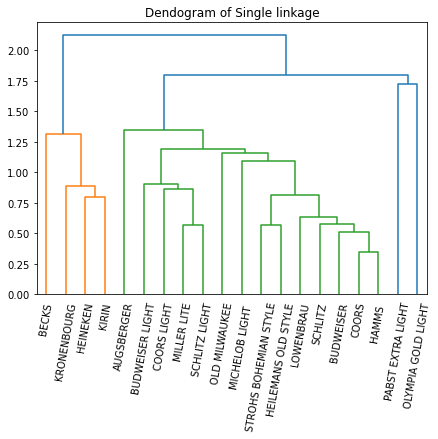

In [12]:
# 계층적 군집분석을 위한 패키지 불러오기
import scipy.cluster.hierarchy as sch
# 계층적 군집분석 시행하기 : 최단연결법
slink = sch.linkage(zbeer, 'single')
# method = 'single', 'complete', 'average', 'median', 'ward'

# 덴드로그램 그리기
plt.figure(figsize = (7, 5))
sch.dendrogram(slink,
             leaf_rotation = 80,
             leaf_font_size = 10,
             labels = beer.index)
plt.title("Dendogram of Single linkage")
plt.show()

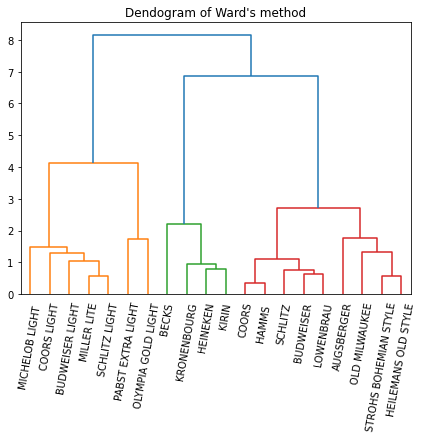

In [13]:
# 계층적 군집분석을 위한 패키지 불러오기
import scipy.cluster.hierarchy as sch
# 계층적 군집분석 시행하기 : 최단연결법
slink = sch.linkage(zbeer, 'ward')

# 덴드로그램 그리기
plt.figure(figsize = (7, 5))
sch.dendrogram(slink,
             leaf_rotation = 80,
             leaf_font_size = 10,
             labels = beer.index)
plt.title("Dendogram of Ward's method")
plt.show()

In [16]:
# 소속 군집 알기
from sklearn.cluster import AgglomerativeClustering

# 계층적 군집분석 : ward 방법
wcluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

# 소속 군집
member = wcluster.fit_predict(zbeer)
member

array([0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 1, 0, 0, 1, 3])

In [20]:
# 군집별 평균 계산
member1 = pd.DataFrame(member, columns = ['cluster'], index = beer.index)
data_combined = beer.join(member1)
data_combined.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,149.00,20.444444,4.800,0.415556
1,70.00,10.500000,2.600,0.420000
2,155.25,10.750000,4.975,0.762500
3,109.20,10.200000,4.100,0.460000


In [21]:
# K-menas Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 표준화
zbeer = StandardScaler().fit_transform(beer)

# K-means Clustering : 군집수 = 2
kmc = KMeans(n_clusters = 2)
kmc.fit(zbeer)

# kmc에 포함된 method를 확인하려면, dir(kmc) 명령어를 실행하면 됨

KMeans(n_clusters=2)

In [28]:
dir(kmc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

In [22]:
# 군집의 중심 파악
kmc.cluster_centers_

array([[ 0.58951901,  0.31958187,  0.49577698,  0.17281486],
       [-1.37554436, -0.74569103, -1.15681296, -0.40323468]])

In [23]:
# 소속 군집 알기
kmc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int32)

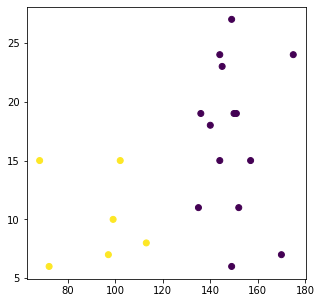

In [27]:
# 소속 군집 산점도
plt.figure(figsize = (5, 5))
plt.scatter(x = beer['calories'], y = beer['sodium'], c = kmc.labels_)
plt.show()